# Simple Linear Regression with Statsmodel and scikit learn

In [61]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
advertising_df = pd.read_csv('advertising.csv')
advertising_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
advertising_df.info()
#We dont have null values in it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
# We have three independent vars such as TV, Radio, Newspaper and one dependent var such as the 'Sales'
# Also there are no null values in the dataframe therefore, we can go ahead to finalize and visualize 
# our features for the prediction

### Visualize the data

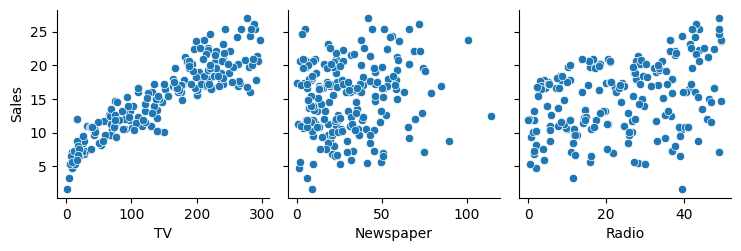

In [11]:
sns.pairplot(advertising_df, x_vars=['TV','Newspaper', 'Radio'], y_vars='Sales', kind='scatter')
plt.show()

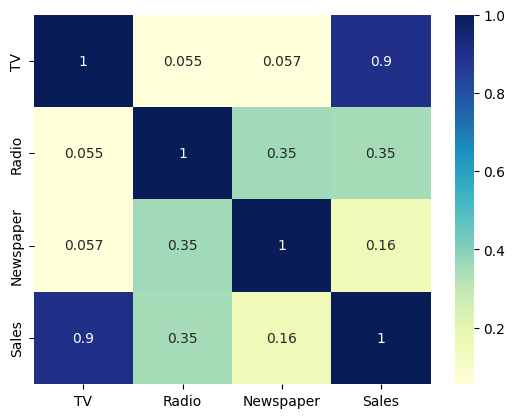

In [12]:
sns.heatmap(advertising_df.corr(), cmap='YlGnBu', annot=True)
plt.show()

#### Its quite evident that the TV and the Sales are correlated compared to the other media sources

## Perform Simple Linear Regression

### We are going tp use the statsmodel package/lib to demonstrate the SLR

In [35]:
X = advertising_df['TV']
y = advertising_df['Sales']

### We are going to split the data in either 80:20 or 70:30 ratio to verify later 

In [36]:
# We are going to manually seggregate the data in ratio without sklearn
total_rows = advertising_df.shape[0]
train_size = int(total_rows*0.70)

X_train = X[0:train_size]
X_test = X[train_size:]
y_train = y[0:train_size]
y_test = y[train_size:]

In [37]:
y_test.shape

(60,)

## Always add a constant else the line will begin from the origin

In [38]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [39]:
# after performing the OLS fit we got the coeffecients in the equation i.e. the intercept and the slope thus we are
# going to check the params to know the coeffecients
lr.params

const    7.092528
TV       0.055799
dtype: float64

In [40]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     692.6
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.21e-55
Time:                        08:24:56   Log-Likelihood:                -305.99
No. Observations:                 140   AIC:                             616.0
Df Residuals:                     138   BIC:                             621.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0925      0.356     19.941      0.000       6.389       7.796
TV             0.0558      0.002     26.317      0.000       0.052       0.060
==============================================================================
Omnibus:                        0.200   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.905   Jarque-Bera (JB):                0.187
Skew:                           0.085   Prob(JB):                        0.911
Kurtosis:                       2.942   Cond. No.                         326.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The inferences or conclusion drawn are
## 1. Since the p values are very low therefore it defines the significance
## 2. Rsquared value is very high stating that the TV explains the variance in Sales
## 3. The high value of Fstats and the low value of prob(F-stats) indicate the correct significance, explains variance is not by chance

## So the equation becomes after params
## This is the final prediction Sales = 7.093 + TV * 0.056 

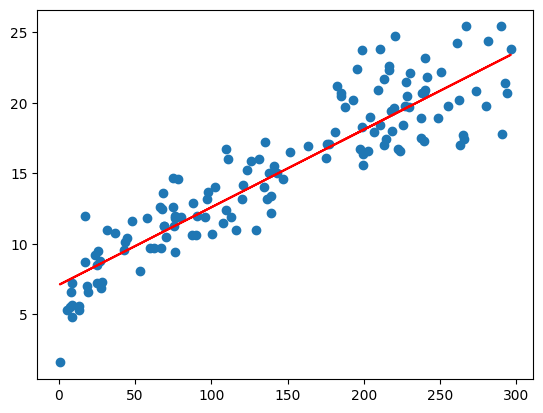

In [41]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.093+0.055*X_train, 'r')
plt.show()

### Residual analysis
#### Check if the error terms are normally distributed with mean as 0 (this is one of the most important assumption about linear regression)

#### we will check by plotting tthe data on histogram for error terms

In [42]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Users\Amitansh\AppData\Local\Temp\ipykernel_34484\3003513444.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


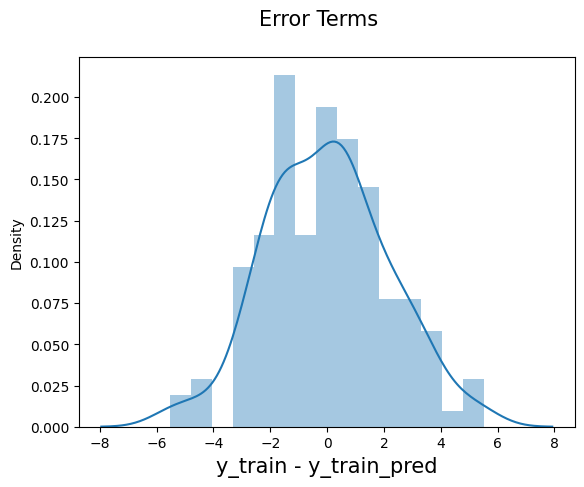

In [43]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

### we can say that it is normally distributed and the mean is 0 as well

#### Lets look at the patterns in the residuals

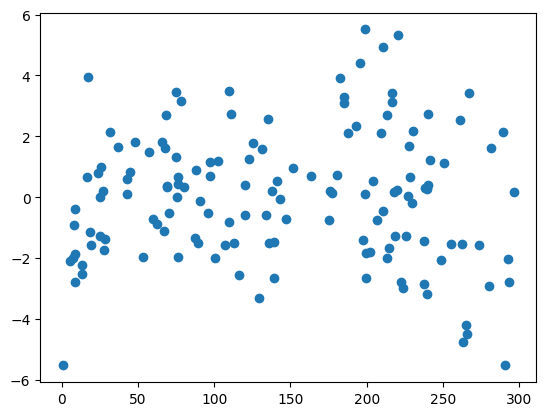

In [44]:
plt.scatter(X_train, res)
plt.show()

### As observed from the pattern above, most of the distribution is around the mean
### However, there is significant variation at high value of X (or TV)

In [45]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [46]:
y_pred.head()

140    11.188160
141    17.900755
142    19.396163
143    12.929082
144    12.460372
dtype: float64

In [51]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.5836634546158925

In [52]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7574366352397274

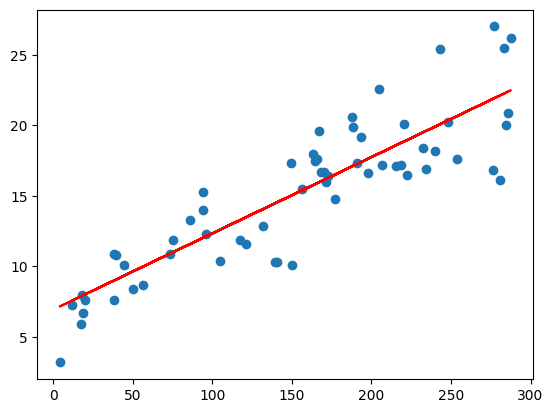

In [53]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

## SLR using sklearn lib

In [55]:
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [59]:
y_train_lm.shape

(140,)

In [62]:
lm = LinearRegression()

In [65]:
# For rectification we will reshape the data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [67]:
X_train_lm.shape

(140, 1)

In [68]:
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [69]:
print(lm.intercept_)
print(lm.coef_)

6.948683200001357
[0.05454575]


### Again the equation is same as the statsmodel which is Sales = 6.948 + 0.055 * TV